<a href="https://colab.research.google.com/github/kingabdullafn/categorical-and-data-transformation-with-sklearn/blob/main/categorical_and_data_transformation_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic Dataset.csv to Titanic Dataset.csv


In [3]:
df = pd.read_csv("/content/Titanic Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male


In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [5]:
nominal_cat = ['Name','Ticket','Cabin']
ordinal_cat = ['Embarked','Gender']

In [7]:
df['Gender'].value_counts()

,count
Gender,
male,127
female,68


In [18]:
gender_categories = ['Female','Male']

In [19]:
df['Gender'] = pd.Categorical(df['Gender'], gender_categories, ordered=True)

In [26]:

df['Gender'] = df['Gender'].astype("category")
median_index = np.median(df['Gender'].cat.codes)
median_gender = gender_categories[int(median_index)]
print(median_gender)

Male


In [27]:
df['Embarked'].value_counts()

,count
Embarked,
S,142
C,36
Q,17


In [28]:
embarked_categories = ['S','C','Q']


In [29]:
df['Embarked'] = pd.Categorical(df['Embarked'], embarked_categories, ordered=True)

In [30]:
df['Embarked'] = df['Embarked'].astype("category")
median_index= np.median(df['Embarked'].cat.codes)
median_Embarked = embarked_categories[int(median_index)]
print(median_Embarked)

S


In [31]:
num_data = df.drop(['Name','Ticket','Cabin','Embarked','Gender'], axis=1)

In [32]:
labels = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

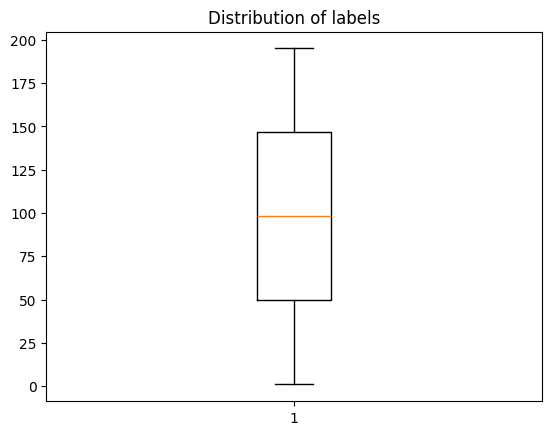

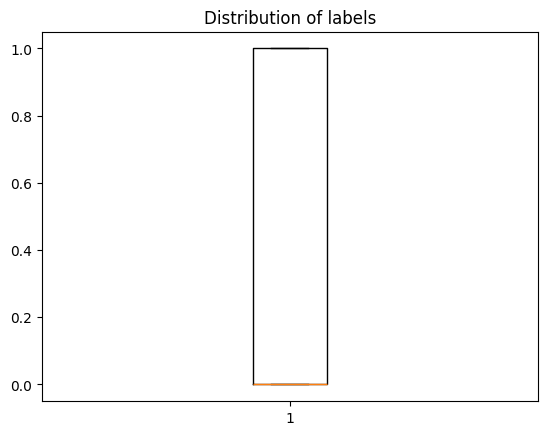

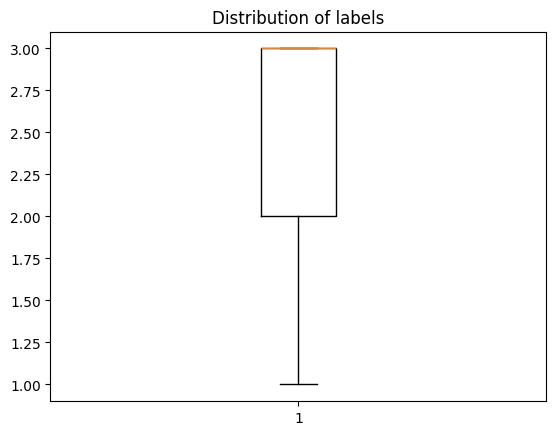

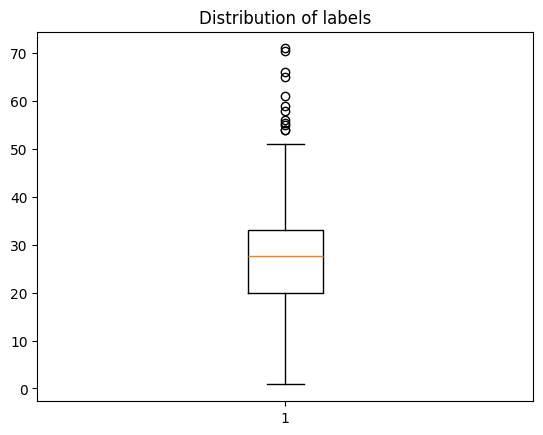

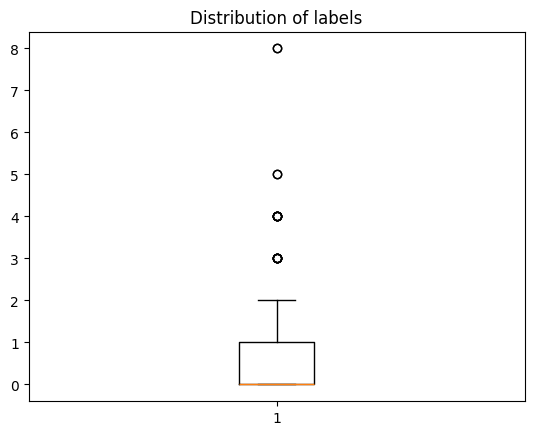

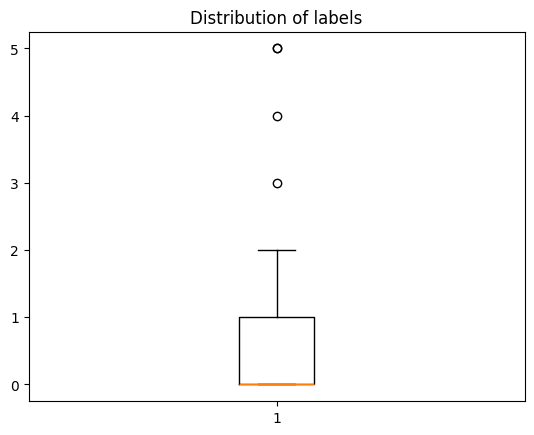

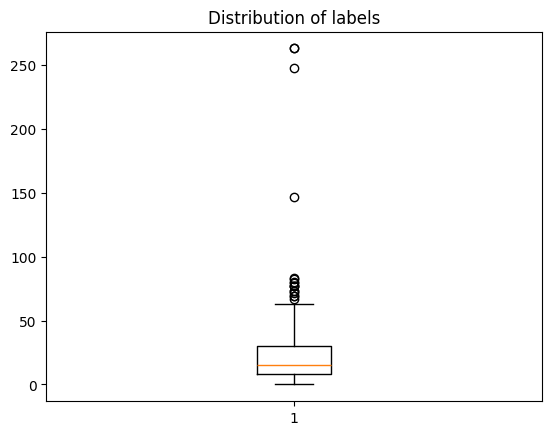

In [34]:
for label in labels:
  plt.boxplot(num_data[label])
  plt.title("Distribution of labels")
  plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data = scaler.fit_transform(num_data)

In [37]:
df.groupby('Age').size().plot(kind="pie", autopct="%.2f")

/tmp/ipython-input-797858908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender').size().plot(kind="pie", autopct="%.2f")
/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:3343: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [45]:
df['Age'].value_counts()

,count
Age,
27.761731,39
21.000000,9
19.000000,8
28.000000,6
29.000000,6
...,...
40.500000,1
55.500000,1
61.000000,1


(array([], dtype=float64), [])

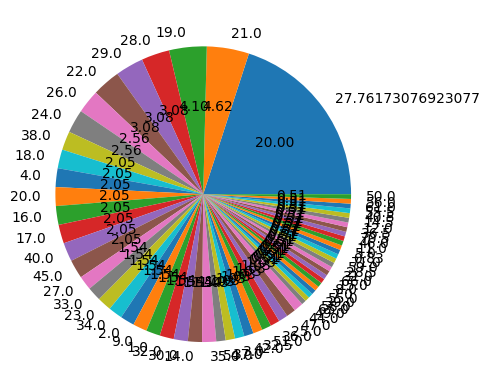

In [49]:
age_counts = df['Age'].value_counts()
plt.pie(age_counts.values, autopct="%.2f", labels=age_counts.index)
plt.xticks(rotation=100)